数据预处理（60%）
	1、数据清洗
		1.1、缺失值处理
		1.2、异常值处理
	2、数据集成：数据挖掘需要的数据往往分布在不同的数据源中， 数据集成就是将  多个数据源合并存放在一个一致的数据存储（ 如数据仓库） 中的过程。
		2.1、实体识别
		2.2、冗余属性识别
	3、数据变换
		3.1、简单函数变换
		3.2、规范化
	4、数据规约

数据清洗主要是删除原始数据集中的无关数据、 重复数据， 平滑噪声数据， 筛选掉与挖掘主题无关的数据， 处理缺失值、 异常值等。


处理缺失值的方法可分为3类： 删除记录、 数据插补和不处理。 

插补方法：
	1、均值、中位数、众数
	2、使用固定值进行插补
	3、最近邻插补
	4、回归方法
	5、插值法
	
拉格朗日插值法和牛顿插值法：拉个朗日插值法适用于某一变量随另外一个变量变化而变化的场合，至少要与另外一个变量相关才行。
	比如随着时间的推移，某个商品的价格变化，因为价格不可能是跃变得，所以猜的价格与时间具有相关性，所以可以使用拉个朗日插值法。


## 拉格朗日插值案例

In [15]:
import pandas as pd
from scipy.interpolate import lagrange
input_file='E://learnFile//chapter4//demo//data/catering_sale.xls'
data=pd.read_excel(input_file)
data['销量'][(data['销量']<400) | (data['销量']>5000)]=None#过滤异常值，先将它变为空

C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
data['销量'].head()

0       NaN
1    2618.2
2    2608.4
3    2651.9
4    3442.1
Name: 销量, dtype: float64

In [18]:
#自定义列向量插值函数，参数分别为列向量，插值位置和前后的数据个数
def ployinterp_column(s,n,k=5):
    y=s[list(range(n-k,n))+list(range(n+1,n+1+k))]#取数
    y=y[y.notnull()]#剔除空值
    return lagrange(y.index,list(y))(n)

#逐个元素判断是否需要插值

for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            data[i][j]=ployinterp_column(data[i],j)

C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
data.to_excel('./result.xlsx')

异常值处理：
    1、删除含有异常值的记录。
    2、视为缺失值
    3、平均值修正
    4、不处理
    
数据集成：将多个数据源合并存放在一个一致的数据存储（如数据仓
        库） 中的过程。
    
数据变换：据变换主要是对数据进行规范化处理， 将数据转换成“适当的”形式， 以      适用于挖掘任务及算法的需要。
    1、简单函数变换：简单函数变换是对原始数据进行某些数学函数变换， 常用的变        换包括平方、 开方、 取对数、 差分运算等。
    2、规范化：
    1、最小最大规范化：X^=(X-min)/(max-min)
    2、零-均值规范化：X^=(X-平均值)/标准差
    3、小数定标规范化：通过移动属性值的小数位数， 将属性值映射到[-1， 1]之          间， 移动的小数位数取决于属性值绝对值的最大值。
    

## 数据规范化代码

In [11]:
import pandas as pd
from scipy.interpolate import lagrange
input_file='E://learnFile//chapter4//demo//data/normalization_data.xls'
data=pd.read_excel(input_file)
#注意header参数设置为None跟不设置的区别

In [12]:
data

,78,521,602,2863
0,144,-600,-521,2245
1,95,-457,468,-1283
2,69,596,695,1054
3,190,527,691,2051
4,101,403,470,2487
5,146,413,435,2571


In [13]:
data=pd.read_excel(input_file,header=None)

In [14]:
data

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


In [16]:
#最小最大规范化
(data-data.min())/(data.max()-data.min())

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [17]:
#均值规范化
(data-data.mean())/data.std()

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [19]:
#小数定标规范化
import numpy as np
data/10**np.ceil(np.log10(data.abs().max()))

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


连续数据离散化：
    连续属性的离散化就是在数据的取值范围内设定若干个离散的划分点， 将取值范围划分为一些离散化的区间， 最后用不同的符号或整数值代表落在每个子区间中的数据值。所以，离散化涉及两个子任务： 确定分类数以及如何将连续属性值映射到这些分类值。
    1、等宽法：将属性值划分为相同宽度的区间。
    2、等频法：将相同数量的记录放到每个区间，缺点在于它对离群点比较敏感， 倾        向于不均匀地把属性值分布到各个区间。
    3、基于聚类分析的方法。
    


## 数据离散化

In [28]:
import pandas as pd
input_file='E://learnFile//chapter4//demo//data/discretization_data.xls'
data=pd.read_excel(input_file)#读取数据


In [29]:
data.head()

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


In [30]:
data=data[u'肝气郁结证型系数'].copy()
k=4
d1=pd.cut(data,k,labels=range(k))#等宽离散化

In [32]:
#等频离散化
w=[1.0*i/k for i in range(k+1)]
w=data.describe(percentiles=w)[4:4+k+1]
w[0]=w[0]*(1-1e-10)
d2=pd.cut(data,w,labels=range(k))

In [35]:
#一维聚类
from sklearn.cluster import KMeans
kmodel=KMeans(n_clusters=k,n_jobs=4)#建立聚类模型
kmodel.fit(data.reshape((len(data),1)))#训练模型

C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
c=pd.DataFrame(kmodel.cluster_centers_).sort(0)#输出聚类中心，并排序（默认是随机顺序的）


C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [37]:
c

,0
1,0.138327
3,0.221695
2,0.295406
0,0.408679


In [38]:
w = pd.rolling_mean(c, 2).iloc[1:] #相邻两项求中点， 作为边界点
w = [0] + list(w[0]) + [data.max()] #把首末边界点加上
d3 = pd.cut(data, w, labels = range(k))

C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  if __name__ == '__main__':


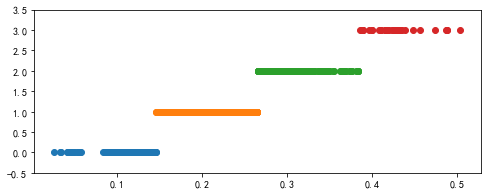

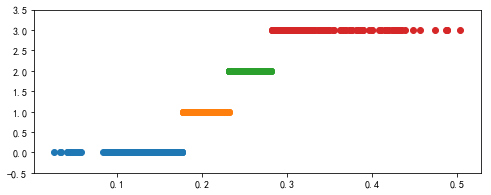

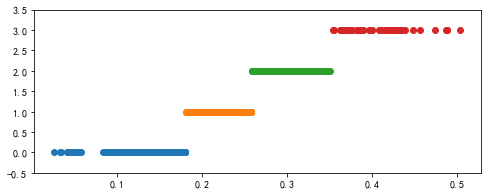

In [49]:
import matplotlib.pyplot as plt
def cluster_plot(d, k): #自定义作图函数来显示聚类结果
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    plt.figure(figsize = (8, 3))
    for j in range(0, k):
        plt.plot(data[d==j], [j for i in d[d==j]], 'o')
        plt.ylim(-0.5, k-0.5)
    return plt
cluster_plot(d1, k).show()
cluster_plot(d2, k).show()
cluster_plot(d3, k).show()

## 属性构造

In [52]:
import pandas as pd
input_file='E://learnFile//chapter4//demo//data/electricity_data.xls'
data=pd.read_excel(input_file)#读取数据

In [53]:
data.head()

,供入电量,供出电量
0,986,912
1,1208,1083
2,1108,975
3,1082,934
4,1285,1102


In [54]:
data['线损率']=(data['供入电量']-data['供出电量'])/data['供入电量']

In [55]:
data.head()

,供入电量,供出电量,线损率
0,986,912,0.075051
1,1208,1083,0.103477
2,1108,975,0.120036
3,1082,934,0.136784
4,1285,1102,0.142412


In [56]:
#两个的差别在于是否有索引，前者有，后者没有
data.to_excel('./have_index.xlsx')
data.to_excel('./False_index.xlsx',index=False)

在大数据集上进行复杂的数据分析和挖掘需要很长的时间， 数据规约产生更小但保持原数据完整性的新数据集。 在规约后的数据集上进行分析和挖掘将更有效率。
数据规约的意义在于：
·降低无效、 错误数据对建模的影响， 提高建模的准确性；
·少量且具代表性的数据将大幅缩减数据挖掘所需的时间；
·降低储存数据的成本

主成分分析：
    用较少的变量去解释原始数据中的大部分变量，即将许多相关性很高的变量转化为彼此相互独立或者不相关的变量。

## 主成分分析

In [57]:
import pandas as pd
input_file='E://learnFile//chapter4//demo//data/principal_component.xls'
data=pd.read_excel(input_file)#读取数据

In [59]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data)
pca.components_#返回模型的各个特征向量

array([[ 0.55109443,  0.20709451,  0.23988437,  0.23233573,  0.34678938,
         0.45528787,  0.03762933,  0.46142876],
       [ 0.7404996 ,  0.04354779, -0.13212454, -0.17534018, -0.3514873 ,
        -0.52582737, -0.01238628,  0.03703641],
       [-0.33678479,  0.0330236 , -0.17885755, -0.12351101, -0.09078126,
        -0.26275564, -0.02377368,  0.87200545],
       [-0.13956568,  0.95185424, -0.03969382, -0.03338392, -0.1683159 ,
         0.00373545,  0.17423499, -0.1144675 ],
       [ 0.05196426,  0.13379506, -0.1045696 , -0.69664955,  0.27247752,
         0.1722427 , -0.61441099, -0.04160271],
       [ 0.04048136, -0.16836777,  0.05560987, -0.59092265, -0.27842789,
         0.40194653,  0.61255242,  0.05854862],
       [-0.01298691, -0.03192465,  0.11496505,  0.18308202, -0.75319132,
         0.40892273, -0.45987092,  0.07797401],
       [-0.10268891,  0.02881645,  0.92961753, -0.17571928, -0.02364476,
        -0.29785515, -0.05748908,  0.03125418]])

In [60]:
pca.explained_variance_#返回各个成分各自的方差百分比

array([  3.95621056e+02,   6.00297534e+01,   2.10221266e+01,
         4.88259458e+00,   6.97826485e-01,   1.67316866e-01,
         7.29128790e-02,   4.74065963e-02])

In [61]:
pca=PCA(3)
pca.fit(data)
low_d=pca.transform(data)
low_d=pd.DataFrame(low_d)

In [62]:
low_d

,0,1,2
0,1.050012,-5.517485,-5.914412
1,-22.997229,-1.975124,-0.209006
2,-13.897677,3.372639,-0.799927
3,5.677104,10.923606,11.640817
4,25.053489,-6.973499,0.857758
5,-2.812806,-6.078801,-2.652072
6,14.148987,16.433028,-4.117091
7,41.831847,-11.329605,3.202778
8,-1.006256,-2.657807,-0.274015
9,-21.334646,-2.825551,0.170441
